In [1]:
import numpy as np


#base orbital and its laplacian
def psi_1s(x, y, z, Z=1, a0=1):
    r = np.sqrt(x*x + y*y + z*z)
    return (Z**1.5/np.sqrt(np.pi*a0**3))*np.exp(-Z*r/a0)

def laplacian_psi_1s(x, y, z, Z=1, a0=1):
    r = np.sqrt(x*x + y*y + z*z)
    psi = psi_1s(x, y, z, Z, a0)
    return (Z/a0)**2*(r - 2*a0/Z)/r * psi


#diagonal integrands and functions
def Kii_integrand(x, y, z, Z=1, a0=1):
    psi = psi_1s(x, y, z, Z=Z, a0=a0)
    lap = laplacian_psi_1s(x, y, z, Z=Z, a0=a0)
    return -0.5 * psi * lap

def sample_uniform(N, L):
    pts = np.random.uniform(-L, L, size=(N, 3))
    return pts[:,0], pts[:,1], pts[:,2]

def sample_gaussian_3d(N, sigma=1.0):
    r = np.random.normal(0, sigma, size=(N, 3))
    return r[:, 0], r[:, 1], r[:, 2]

def gaussian_pdf_3d(x, y, z, sigma=1.0):
    r2 = x*x + y*y + z*z
    norm = (2*np.pi*sigma**2)**1.5
    return np.exp(-0.5*r2/sigma**2) / norm

def Kii_uniform(N, L=7.0, Z=1, a0=1):
    x, y, z = sample_uniform(N, L)
    vals = Kii_integrand(x, y, z, Z=Z, a0=a0)
    V = (2.0*L)**3
    mean = np.mean(vals)
    est  = V * mean
    return est

def Kii_importance(N, Z=1, a0=1, sigma=1.0):
    x, y, z = sample_gaussian_3d(N, sigma)
    num = Kii_integrand(x, y, z, Z=Z, a0=a0)
    den = gaussian_pdf_3d(x, y, z, sigma)
    w = num / den
    est = np.mean(w)
    return est

#off-diagonal integrands and functions
def Kij_integrand(x, y, z, Rz=1.4, Z=1, a0=1):

    d = 0.5*Rz
    psi_plus  = psi_1s(x, y, z+d, Z=Z, a0=a0)
    lap_minus = laplacian_psi_1s(x, y, z-d, Z=Z, a0=a0)
    return -0.5 * psi_plus * lap_minus


def Kij_uniform(N, L=7.0, Rz=1.4, Z=1, a0=1):
    x, y, z = sample_uniform(N, L)
    vals = Kij_integrand(x, y, z, Rz=Rz, Z=Z, a0=a0)
    V = (2.0*L)**3
    mean = np.mean(vals)
    est  = V * mean
    return est

def Kij_importance(N, Rz=1.4, Z=1, a0=1, sigma=1.0):

    x, y, z = sample_gaussian_3d(N, sigma)
    num = Kij_integrand(x, y, z, Rz=Rz, Z=Z, a0=a0)
    den = gaussian_pdf_3d(x, y, z, sigma)
    w = num / den
    est = np.mean(w)
    return est

In [4]:
import matplotlib.pyplot as plt

def compare_methods_diagonal(N_list, L=7.0, sigma=1.0, Z=1, a0=1):
    Kii_uni, Kii_imp = [], []
    for N in N_list:
        u_est = Kii_uniform(N, L=L, Z=Z, a0=a0)
        i_est = Kii_importance(N, Z=Z, a0=a0, sigma=sigma)
        Kii_uni.append(u_est)
        Kii_imp.append(i_est)

    plt.figure(figsize=(6,4))
    plt.plot(N_list, Kii_uni, 'o-', label='Uniform sampling')
    plt.plot(N_list, Kii_imp, 's-', label='importance sampling')
    plt.xscale('log')
    plt.xlabel("N")
    plt.ylabel(r"$K_{ii}$")
    plt.title("Diagonal kinetic energy convergence")
    plt.legend()
    plt.tight_layout()
    plt.show()


def compare_methods_offdiag(N_list, L=7.0, Rz=1.4, sigma=1.0, Z=1, a0=1):
    Kij_uni, Kij_imp = [], []
    for N in N_list:
        u_est = Kij_uniform(N, L=L, Rz=Rz, Z=Z, a0=a0)
        i_est = Kij_importance(N, Rz=Rz, Z=Z, a0=a0, sigma=sigma)
        Kij_uni.append(u_est)
        Kij_imp.append(i_est)

    plt.figure(figsize=(6,4))
    plt.plot(N_list, Kij_uni, 'o-', label='Uniform sampling')
    plt.plot(N_list, Kij_imp, 's-', label='importance sampling')
    plt.xscale('log')
    plt.xlabel("N")
    plt.ylabel(r"$K_{ij}$")
    plt.title(f"Off-diagonal kinetic energy")
    plt.legend()
    plt.tight_layout()
    plt.show()

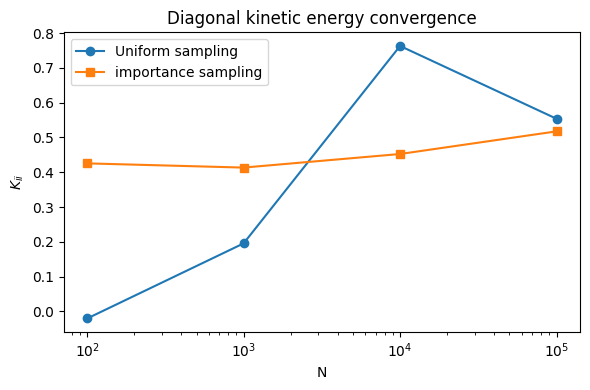

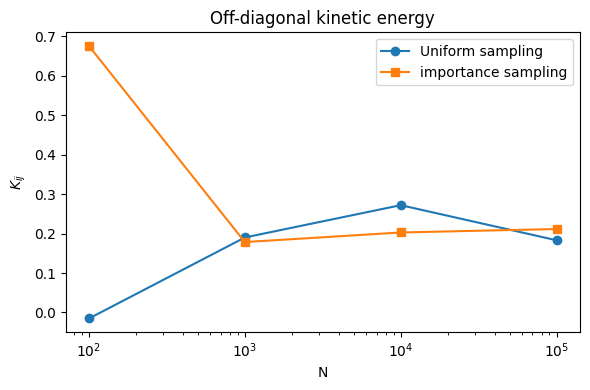

In [5]:
N_list = [10**2, 10**3, 10**4, 10**5]
compare_methods_diagonal(N_list, L=7.0, sigma=1.5)
compare_methods_offdiag(N_list, L=7.0, Rz=1.4, sigma=1.5)

In [ ]:
# Importance sampling, as expected, gives faster and more stable convergence. Uniform samples is all over the place, and does not seem to be reliable until very large N.